  # Movie reccomendation system
  

Building recomendation systems based on average weight score, popularity, and similarity content

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
credits = pd.read_csv(r'D:\DS_PROJ\Recommendation_System/tmdb_5000_credits.csv')
movies = pd.read_csv(r'D:\DS_PROJ\Recommendation_System/tmdb_5000_movies.csv')

In [104]:
credits.head(4)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [105]:
movies.head(4)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


In [106]:
#moveis an credit df's have one feature in common to link them "movie_id" and "id"
#rename the movie_id into id

credits_upd_df = credits.rename(columns = {'movie_id' : 'id'})

In [107]:
credits_upd_df

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [108]:
movies.shape

(4803, 20)

In [109]:
credits_upd_df.shape

(4803, 4)

In [110]:
#merge bot df, inner join by default
movies_merge_df = movies.merge(credits_upd_df, on= 'id')

In [111]:
movies_merge_df.shape

(4803, 23)

In [112]:
movies_merge_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [113]:
#drop some columns that might not be relevant
movies_cleaned_df = movies_merge_df.drop(columns=['homepage', 'title_x','title_y','status','production_companies','tagline'])

The average weighted recommendation system is based in the following equation: 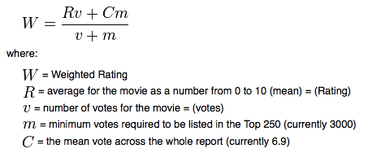

In [114]:
movies_cleaned_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [115]:
#we find the values needed to obtain the weigthed rating in the data frame
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
c = movies_cleaned_df['vote_average'].mean()

In [116]:
#we have to compute the value of m (minimum votes required to be listed in the top 250)
movies_cleaned_df[['original_title','vote_count']]

,original_title,vote_count
0,Avatar,11800
1,Pirates of the Caribbean: At World's End,4500
2,Spectre,4466
3,The Dark Knight Rises,9106
4,John Carter,2124
...,...,...
4798,El Mariachi,238
4799,Newlyweds,5
4800,"Signed, Sealed, Delivered",6
4801,Shanghai Calling,7


<AxesSubplot:xlabel='vote_count'>

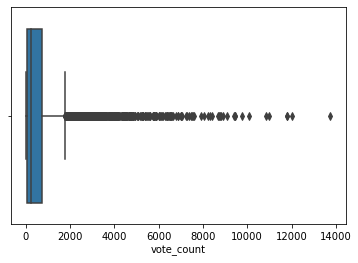

In [117]:
#visualizing by a boxplot
sns.boxplot(data=movies_cleaned_df, x='vote_count')

it's observed  high amount of outliers, we filter tose values using the 90th quantile

In [118]:
threshold = movies_cleaned_df['vote_count'].quantile(0.9)

In [119]:
filtered_df = movies_cleaned_df[movies_cleaned_df['vote_count'] >= threshold]

In [120]:
filtered_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.2,2184,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de..."
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",8.0,3697,"[{""cast_id"": 20, ""character"": ""Mr. White/Larry...","[{""credit_id"": ""52fe424ac3a36847f8012cb9"", ""de..."
4302,1200000,"[{""id"": 37, ""name"": ""Western""}]",429,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",it,"Il buono, il brutto, il cattivo",While the Civil War rages between the Union an...,88.377076,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-12-23,6000000,161.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}]",8.1,2311,"[{""cast

In [121]:
#we consider the m value as the threshold
m = threshold

In [122]:
m

1838.4000000000015

In [123]:
v

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [124]:
R

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [125]:
c

6.092171559442011

In [126]:
#since we have filtered data we need new R,c,v values
v = filtered_df['vote_count']
R = filtered_df['vote_average']
c = filtered_df['vote_average'].mean()

In [127]:
filtered_df['weighted_avg'] = ((R*v)+(c*m))/(v+m)

In [128]:
filtered_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew,weighted_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.168053
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.918271
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.493333
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.492998
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.500396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.2,2184,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",7.091679
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",8.0,3697,"[{""cast_id"": 20, ""character"": ""Mr. White/Larry...","[{""credit_id"": ""52fe424ac3a36847f8012cb9"", ""de...",7.655593
4302,1200000,"[{""id"": 37, ""name"": ""Western""}]",429,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",it,"Il buono, il brutto, il cattivo",While the Civil War rages between the Union an...,88.377076,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-12-23,6000

In [129]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [130]:
df_ranking = filtered_df.sort_values('weighted_avg', ascending= False).head(20)

In [131]:
df_ranking[['original_title','vote_average','vote_count','weighted_avg','popularity']]

,original_title,vote_average,vote_count,weighted_avg,popularity
1881,The Shawshank Redemption,8.5,8205,8.218658,136.747729
662,Fight Club,8.3,9413,8.081543,146.757391
3232,Pulp Fiction,8.3,8428,8.060583,121.463076
3337,The Godfather,8.4,5893,8.058304,143.659698
65,The Dark Knight,8.2,12002,8.035690,187.322927
809,Forrest Gump,8.2,7927,7.967126,138.133331
96,Inception,8.1,13752,7.965926,167.583710
95,Interstellar,8.1,10867,7.935482,724.247784
1990,The Empire Strikes Back,8.2,5879,7.905327,78.517830
1818,Schindler's List,8.3,4329,7.901461,104.469351


In [132]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

<AxesSubplot:xlabel='weighted_avg', ylabel='original_title'>

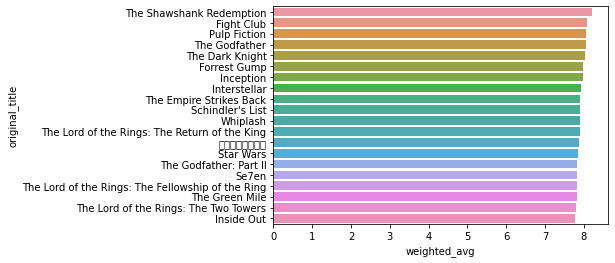

In [133]:
#visualize the top 20 movies order by weighted average value
sns.barplot(x =df_ranking['weighted_avg'] , y = df_ranking['original_title'] )

# Recommendation system based on popularity


In [134]:

popularity_df = filtered_df.sort_values('popularity', ascending = False)

In [135]:
popularity_df['popularity']

546     875.581305
95      724.247784
788     514.569956
94      481.098624
127     434.278564
           ...    
101       3.195174
203       2.871739
508       2.502487
2511      2.186927
334       1.859364
Name: popularity, Length: 481, dtype: float64

<AxesSubplot:title={'center':'Top 10 popular movies'}, ylabel='original_title'>

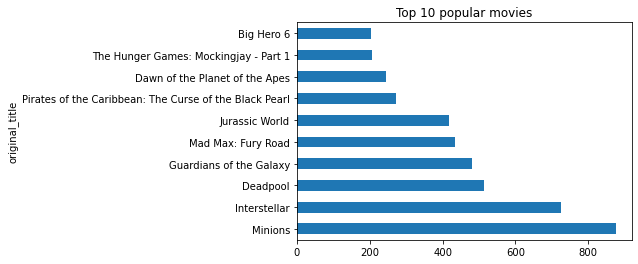

In [136]:
popularity_df.set_index('original_title')['popularity'][0:10].plot.barh(title = 'Top 10 popular movies')

## Normalizing values 
To build a model based on average weighted recommendation and popularity we need to normalize both features


In [137]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [138]:
filtered_df.shape

(481, 18)

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
#scaler
scaling = MinMaxScaler()

In [141]:
scaling_values = scaling.fit_transform(filtered_df[['weighted_avg','popularity']])

In [142]:
#normalized values for both features
scaling_values

array([[6.07105692e-01, 1.70052057e-01],
       [5.13694950e-01, 1.57055975e-01],
       [3.54781125e-01, 1.20767740e-01],
       [7.28625394e-01, 1.26417320e-01],
       [3.57422391e-01, 4.81476189e-02],
       [2.67868739e-01, 1.30293683e-01],
       [6.35715979e-01, 5.35898240e-02],
       [6.29525802e-01, 1.51558361e-01],
       [6.51717202e-01, 1.11049372e-01],
       [1.56297878e-01, 1.76178577e-01],
       [3.31206009e-01, 1.21399546e-01],
       [5.40667902e-01, 1.64798442e-01],
       [3.09017976e-01, 5.40075621e-02],
       [3.96105127e-01, 1.11635797e-01],
       [6.71778847e-01, 1.63197537e-01],
       [3.76912331e-01, 1.52856974e-01],
       [3.32533972e-01, 5.74276697e-02],
       [5.67381062e-01, 1.36320691e-01],
       [3.95058813e-01, 1.00726453e-01],
       [6.99807514e-01, 1.05881741e-01],
       [4.54440552e-01, 6.79468412e-02],
       [6.91969549e-01, 1.12354435e-01],
       [5.71281806e-01, 2.24914840e-01],
       [2.37787350e-01, 7.21843129e-02],
       [3.875885

In [143]:
filtered_df[['weighted_avg_scaled', 'popularity_scaled']] = scaling_values

In [144]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [145]:
#we create a new feature, considering weighted_avg_scaled and populrity both having the same importance (50%, 50%)

filtered_df['score_mix'] = filtered_df['weighted_avg_scaled'] * 0.5 + filtered_df['popularity_scaled']

In [146]:
filtered_df.head(4)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,...,runtime,spoken_languages,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled,score_mix
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.168053,0.607106,0.170052,0.473605
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.918271,0.513695,0.157056,0.413903
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.493333,0.354781,0.120768,0.298158
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.492998,0.728625,0.126417,0.490730


In [147]:
rank_score_df = filtered_df.sort_values('score_mix', ascending = False).head(10)

In [148]:
#import plotly.express as px

Text(0.5, 1.0, 'Top 10 hybrid based recommendation')

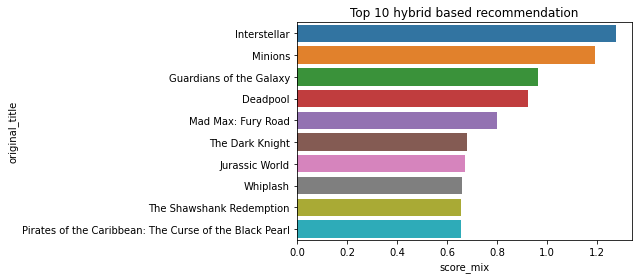

In [158]:
sns.barplot(data = rank_score_df,y = 'original_title', x= 'score_mix').set_title('Top 10 hybrid based recommendation')


# Content based recommendation System

We create a system recommendation based on similar content between the movies

To build a model that can find similarities, the 'overview' feature will be important


In [159]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled', 'score_mix'],
      dtype='object')

In [162]:
data = filtered_df.copy()

In [164]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled', 'score_mix'],
      dtype='object')

In [165]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [168]:
#cleaning data for that feature
data['overview'].isnull().sum()

0

To use the overview feature for the algorithm, it needs to be transformed into vectorial form (TF-IDF)

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [175]:
tfv = TfidfVectorizer(min_df= 3, max_features = None, ngram_range = (1,3), stop_words = 'english')

In [176]:
tfv_matrix = tfv.fit_transform(data['overview'])

In [177]:
tfv_matrix

<481x1287 sparse matrix of type '<class 'numpy.float64'>'
	with 8196 stored elements in Compressed Sparse Row format>

In [178]:
tfv_matrix.shape

(481, 1287)

In [179]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [180]:
tfv_matrix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [181]:
pd.DataFrame(tfv_matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
477,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,0.267267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25119,0.326234,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To define how similar are the movies between them, we need to measure it as a similarity score
we use a sigmoid kernel to score the similarity between the movies overviews

In [183]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [184]:
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [185]:
sig

array([[0.76192028, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76192028, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76192028, ..., 0.76159416, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76192028, 0.7616054 ,
        0.76161335],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.7616054 , 0.76192028,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76161335, 0.76159416,
        0.76192028]])

In [186]:
#sig is the simmilarity matrix (481x481) where all the similarity values between each movie is display
#we can see that the max values are in the main diagonal since the similarity between the same objects are max
pd.DataFrame(sig)

,0,1,2,3,4,5,6,7,8,9,...,471,472,473,474,475,476,477,478,479,480
0,0.761920,0.761594,0.761594,0.761612,0.761594,0.761609,0.761594,0.761619,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
1,0.761594,0.761920,0.761594,0.761594,0.761623,0.761594,0.761594,0.761609,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761604,0.761594,0.761594,0.761594,0.761594
2,0.761594,0.761594,0.761920,0.761594,0.761594,0.761594,0.761594,0.761608,0.761606,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
3,0.761612,0.761594,0.761594,0.761920,0.761601,0.761597,0.761604,0.761606,0.761604,0.761680,...,0.761594,0.761594,0.761614,0.761603,0.761594,0.761594,0.761601,0.761594,0.761620,0.761594
4,0.761594,0.761623,0.761594,0.761601,0.761920,0.761594,0.761601,0.761618,0.761594,0.761606,...,0.761631,0.761594,0.761594,0.761594,0.761594,0.761610,0.761594,0.761603,0.761605,0.761594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.761594,0.761604,0.761594,0.761594,0.761610,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761920,0.761594,0.761594,0.761594,0.761594
477,0.761594,0.761594,0.761594,0.761601,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761615,0.761594,0.761920,0.761594,0.761611,0.761594
478,0.761594,0.761594,0.761594,0.761594,0.761603,0.761607,0.761594,0.761594,0.761594,0.761602,...,0.761643,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761920,0.761605,0.761613
479,0.761594,0.761594,0.761594,0.761620,0.761605,0.761600,0.761610,0.761610,0.761594,0.761621,...,0.761594,0.761594,0.761606,0.761594,0.761594,0.761594,0.761611,0.761605,0.761920,0.761594


With this tool we can build a system recommendation system based on similar content

In [187]:
data['original_title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4291                                         Saw
4300                              Reservoir Dogs
4302             Il buono, il brutto, il cattivo
4337                                 Taxi Driver
4602                                12 Angry Men
Name: original_title, Length: 481, dtype: object

In [198]:
#we create a series with the title as a index and the data index as the value, 
#so we can obtain the index using a title string value
indices = pd.Series(data = data.index, index= data['original_title'] )

In [199]:
#index for john carter movie
indices['John Carter']

4

In [195]:
sig[indices['John Carter']]

array([0.76159416, 0.76162291, 0.76159416, 0.76160082, 0.76192028,
       0.76159416, 0.76160138, 0.76161785, 0.76159416, 0.76160598,
       0.76159416, 0.76161264, 0.76159416, 0.76159981, 0.76163616,
       0.76160531, 0.76160351, 0.761608  , 0.76159919, 0.76159416,
       0.76160391, 0.76159416, 0.76162762, 0.76163176, 0.76162277,
       0.76160564, 0.76159416, 0.76160124, 0.76161531, 0.76159416,
       0.76159416, 0.76160432, 0.76161939, 0.76159416, 0.76159416,
       0.76160862, 0.76159966, 0.7616077 , 0.76159416, 0.76160484,
       0.76159416, 0.76161082, 0.76163971, 0.76163238, 0.76161556,
       0.76160042, 0.76162982, 0.76161036, 0.7616078 , 0.76160093,
       0.76159416, 0.76160538, 0.76159416, 0.76160638, 0.76159416,
       0.76159416, 0.76159416, 0.76160926, 0.76160147, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76162617,
       0.76160836, 0.76159416, 0.76161445, 0.76159416, 0.76161497,
       0.76161359, 0.76163629, 0.76159867, 0.76159416, 0.76159

In [197]:
#create a tuple that index each simmilar score value
list(enumerate(sig[indices['John Carter']]))

[(0, 0.7615941559557649),
 (1, 0.7616229088408012),
 (2, 0.7615941559557649),
 (3, 0.7616008163245983),
 (4, 0.7619202832910208),
 (5, 0.7615941559557649),
 (6, 0.7616013799166629),
 (7, 0.7616178496862341),
 (8, 0.7615941559557649),
 (9, 0.7616059786095721),
 (10, 0.7615941559557649),
 (11, 0.7616126396464535),
 (12, 0.7615941559557649),
 (13, 0.7615998113282151),
 (14, 0.761636163508133),
 (15, 0.7616053083212344),
 (16, 0.7616035081796559),
 (17, 0.7616079960800364),
 (18, 0.7615991929634056),
 (19, 0.7615941559557649),
 (20, 0.7616039114915023),
 (21, 0.7615941559557649),
 (22, 0.7616276232807233),
 (23, 0.7616317595194468),
 (24, 0.7616227668347585),
 (25, 0.7616056434394469),
 (26, 0.7615941559557649),
 (27, 0.761601236318118),
 (28, 0.7616153090036627),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.761604321111517),
 (32, 0.7616193890339251),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7616086167863519),
 (36, 0.7615996598397013),
 (37, 0.761607

In [204]:
#sorting by the similarity score value
sigma = sorted(list(enumerate(sig[indices['John Carter']])),key=lambda x : x[1], reverse = True)

In [205]:
#getting the 10 most similar movies
sigma[0:10]

[(4, 0.7619202832910208),
 (76, 0.7616518249178785),
 (281, 0.7616437894351968),
 (447, 0.7616431801535386),
 (195, 0.7616409940347173),
 (42, 0.7616397147718132),
 (125, 0.7616380036454662),
 (71, 0.761636288225287),
 (14, 0.761636163508133),
 (144, 0.7616348376324142)]

In [206]:
#extract he indexes
ind = [i[0] for i in sigma[0:10]]

In [207]:
ind

[4, 76, 281, 447, 195, 42, 125, 71, 14, 144]

In [211]:
#reset index because the kernel function reset all the indexes
df_reset_index = data.reset_index()

In [210]:
 
df_reset_index['original_title'][ind]

4                                John Carter
76              Independence Day: Resurgence
281                      The Bourne Identity
447                    2001: A Space Odyssey
195                        The Fifth Element
42                X-Men: Days of Future Past
125       Captain America: The First Avenger
71       Captain America: The Winter Soldier
14                              The Avengers
144    The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

Those are the top 10 recommended movies based on how similar are to one speccific movie